## Removed files from App data folder

To create plots to match with xcal files , i manually removed the date folders from app_data locally


These are the files removed:
['matplotlibrc', 'plot_data.py', '06-22','06-29','07-03','2023-02-08','2023-07-05','2023-07-12','2023-08-02']

In [9]:
# importing all of the necessary libraries 
import os
from datetime import datetime
from sample_tput_parser import getParseData
import numpy as np
import pandas as pd

In [10]:
# all of the app data is stored in here.
TARGET_FOLDER='./app_data'

In [11]:
# Getting all of the dates in evalDates variable, and handling missing year values in some of the folder names
folderNames=os.listdir(TARGET_FOLDER)
evalDates=[]
for folder in folderNames:
    # Handle 2022 dates
    if len(folder)==5:
        evalDates.append('2022_'+folder)

    # Handle dates starting with 23
    elif folder.startswith('23'):
        evalDates.append('20'+folder)

print(len(evalDates))

47


In [12]:
# Convert it to timestamps
DATE_FORMAT="%Y_%m_%d"
evalTimeStamps=[]
for currDate in evalDates:
    evalTimeStamps.append(datetime.strptime(currDate,DATE_FORMAT))


In [13]:
# Read files and create averages 
def getAveragesFromSinglePhoneFiles(fileName :str ,fileFolderList :list) -> list:
    """
    Reads the fileName with count 1-5 and returns a list of lists of averages.
    args:
        fileName : name of the files to be read
        fileFolderList: The folder location provided as a list
    return:
        A list of lists of averages, where a single element consists of averages of five files for a given date 
    """
    selectedPath=os.path.join(fileFolderList[0],fileFolderList[1])
    # XCAL improper folders also excluded
    IGNORED_FILES=['matplotlibrc', 'plot_data.py', '06-22','06-29','07-03','2023-02-08','2023-07-05','2023-07-12','2023-08-02']
    averageResults=[]
    for dateFolder in os.listdir(TARGET_FOLDER):
        if dateFolder not in IGNORED_FILES: 
            currPath=os.path.join(TARGET_FOLDER,dateFolder)
            phoneDataPath=os.path.join(currPath,selectedPath)
            averages=[]
            for currFile in os.listdir(phoneDataPath):
                if currFile in [f"{fileName}{i}.out" for i in range(1,6)]:
                    currFilePath=os.path.join(phoneDataPath,currFile)
                    currAverage=np.mean(getParseData(currFilePath))
                    averages.append(currAverage)
            averageResults.append(averages)
    return averageResults

In [14]:
res  = [str(d)[:10] for d in evalTimeStamps]
res

['2022-06-26',
 '2022-07-10',
 '2022-07-13',
 '2022-07-17',
 '2022-07-27',
 '2022-08-31',
 '2022-09-04',
 '2022-09-14',
 '2022-09-18',
 '2022-10-09',
 '2022-10-16',
 '2022-10-19',
 '2022-10-26',
 '2022-10-30',
 '2022-11-06',
 '2022-11-09',
 '2022-11-13',
 '2022-11-16',
 '2022-11-20',
 '2022-12-04',
 '2022-12-11',
 '2022-12-18',
 '2022-12-21',
 '2023-01-05',
 '2023-01-15',
 '2023-01-18',
 '2023-01-29',
 '2023-02-15',
 '2023-02-19',
 '2023-02-26',
 '2023-03-05',
 '2023-03-08',
 '2023-03-15',
 '2023-03-22',
 '2023-03-26',
 '2023-04-09',
 '2023-04-13',
 '2023-04-20',
 '2023-04-22',
 '2023-05-03',
 '2023-06-11',
 '2023-06-14',
 '2023-06-18',
 '2023-07-02',
 '2023-07-19',
 '2023-07-26',
 '2023-07-30']

In [15]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.lines as mlines
 
def plotData(evalTimeStamps,averageResults,title,xlabel=None,ylabel=None,legend=None):
    """
    Plots a scatterplot for given dates and values with title
    args:
        evalTimeStamps : The timestamps 
        averageResutls : The average valeus observed
        title : The title string
    return:
        A plot with orange color for Sundays, green for Wednesdays and blue for other days
    """
    # Create scatter plot
    plt.figure(figsize=(20,6))

    evalTimeStamps = [str(d)[:10] for d in evalTimeStamps]
    
    # There are five values per date
    for i,values in zip(evalTimeStamps,averageResults):
        plt.scatter([i]*len(values), values,color='blue')
    
    # Formatting x-axis to show date properly  - to show day of the week
    # plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%a %Y-%m-%d'))
    # plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # this will reduce the density of xticks
    # plt.gcf().autofmt_xdate()
  
    f = 12 # fontsize
    plt.xticks(evalTimeStamps,fontweight='bold',fontsize=10,rotation=90)
    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10)
    # Adding labels and title
    if xlabel == None and ylabel == None:
        plt.xlabel('Date',fontsize=f)
        plt.ylabel('Averages observed (Mbps)', fontsize=f)
    else:
        plt.xlabel(xlabel,fontsize=f)
        plt.ylabel( ylabel, fontsize=f)
    
    plt.title(title,fontsize=f)
    plt.grid(True)
    plt.tight_layout()
    plt.legend([legend], loc='upper right',fontsize='15')

    # Show the plot
    plt.show()



### One Phone Tput

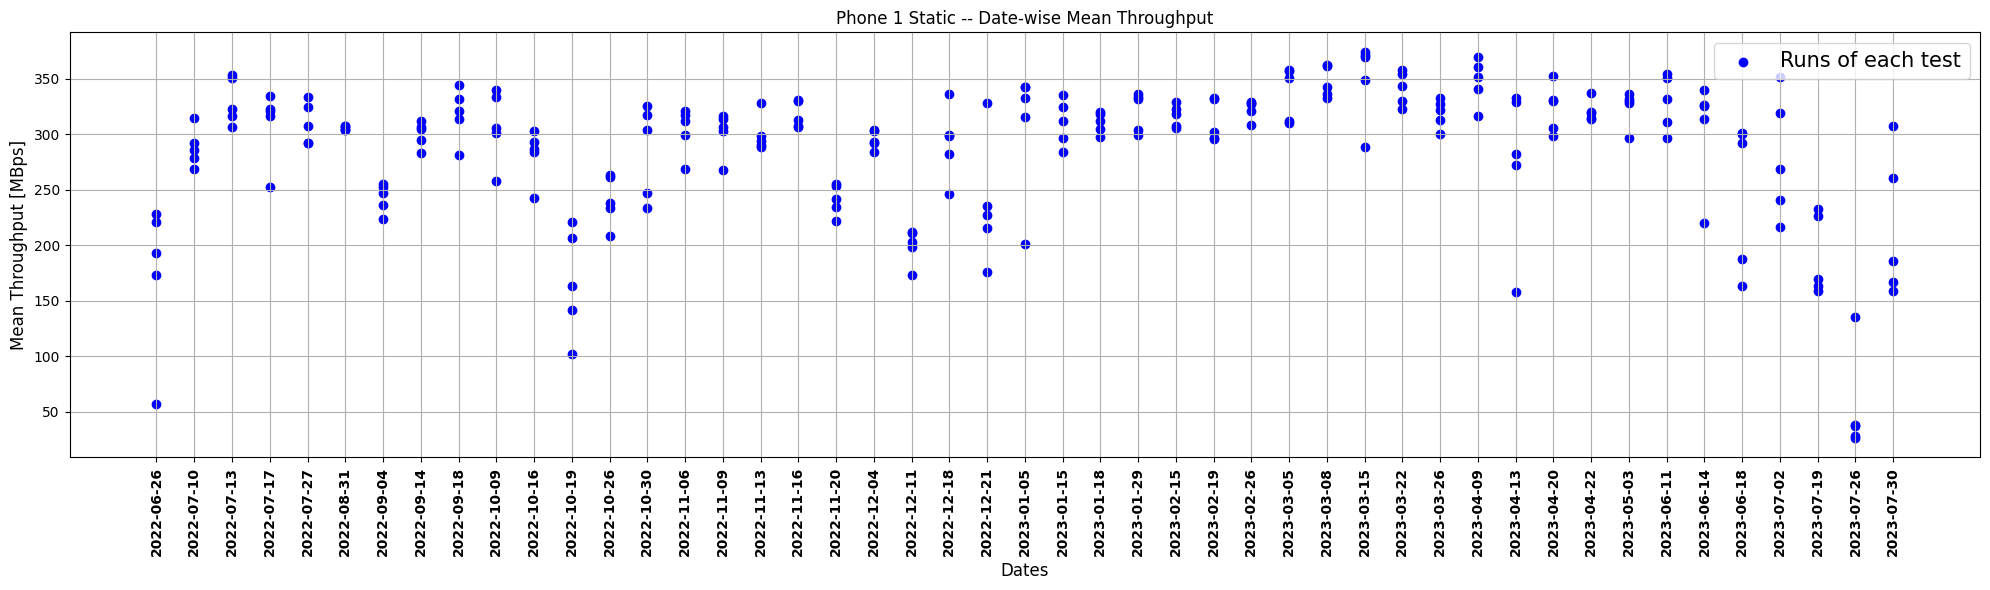

In [16]:
# phone 1 
SINGLE_PHONE_PATH_LIST=["phone_1","one_phone"]
averageResults=getAveragesFromSinglePhoneFiles('run_static',SINGLE_PHONE_PATH_LIST)
plotData(evalTimeStamps,averageResults,title='Phone 1 Static -- Date-wise Mean Throughput',xlabel='Dates',ylabel='Mean Throughput [MBps]',legend='Runs of each test')


### One Phone Tput Staticaway

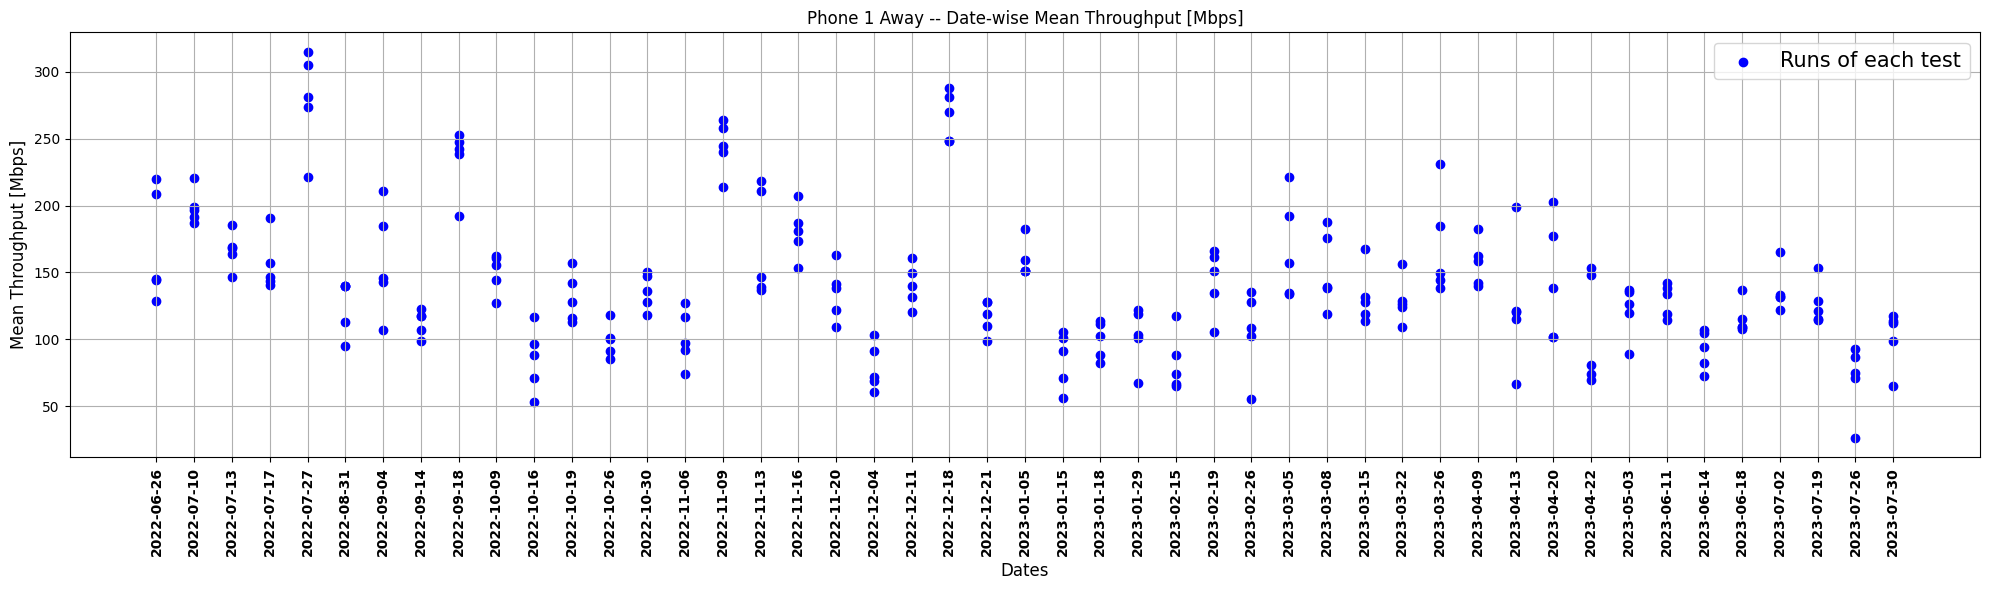

In [17]:
averageResults=getAveragesFromSinglePhoneFiles('run_staticaway',SINGLE_PHONE_PATH_LIST)
plotData(evalTimeStamps,averageResults,title='Phone 1 Away -- Date-wise Mean Throughput [Mbps]', ylabel='Mean Throughput [Mbps]',xlabel='Dates',legend='Runs of each test')

In [18]:
def getAveragesFromSinglePhoneFiles_twopoints(fileName :str ,fileFolderList :list) -> list:
    """
    Reads the fileName with count 1-5 and returns a list of lists of averages.
    args:
        fileName : name of the files to be read
        fileFolderList: The folder location provided as a list
    return:
        A average of all the five tests that we conduct  --> this will only generate two points 
    """
    selectedPath=os.path.join(fileFolderList[0],fileFolderList[1])
    IGNORED_FILES=['matplotlibrc', 'plot_data.py']
    averageResults=[]
    for dateFolder in os.listdir(TARGET_FOLDER):
        if dateFolder not in IGNORED_FILES: 
            currPath=os.path.join(TARGET_FOLDER,dateFolder)
            phoneDataPath=os.path.join(currPath,selectedPath)
            averages=[]
            for currFile in os.listdir(phoneDataPath):
                if currFile in [f"{fileName}{i}.out" for i in range(1,6)]:
                    currFilePath=os.path.join(phoneDataPath,currFile)
                    currAverage= getParseData(currFilePath)
                    averages.extend(currAverage)
            averageResults.append(np.mean(averages))    # mean of all five averages --> instead of a single test averages
    return averageResults

In [19]:
def plotDualPhoneData(evalTimeStamps,averageResults_firstPhone,averageResults_secondPhone,title,labels,xlabel=None,ylabel=None):
    """
    Same pattern as single phone plot, just for two phones.
    """

    plt.figure(figsize=(20,6))
    evalTimeStamps = [str(d)[:10] for d in evalTimeStamps]
    
    # Loop through each date and corresponding set of values
    for date, values in zip(evalTimeStamps, averageResults_firstPhone):
        

        # Repeat the current date for each value in values
        dates = [date] * len(values)
        
        # Plot the values against the repeated date
        plt.scatter(dates,values,color='blue',marker='o',label= labels[0] if date==evalTimeStamps[0] else "")

    for date, values in zip(evalTimeStamps, averageResults_secondPhone):
        # Repeat the current date for each value in values
        dates = [date] * len(values)
        
        # Plot the values against the repeated date

        plt.scatter(dates,values,color='red',marker='x',label= labels[1] if date==evalTimeStamps[0] else "")

    plt.legend()

    # Formatting x-axis to show date properly
    # plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%a %Y-%m-%d'))
    # plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
    # plt.gcf().autofmt_xdate()

    f = 10 # fontsize
    plt.xticks(evalTimeStamps,fontweight='bold',fontsize=10,rotation=90)
    plt.yticks(fontsize=10)
    # Adding labels and title
    if xlabel == None and ylabel == None:
        plt.xlabel('Date',fontsize=f)
        plt.ylabel('Averages observed (Mbps)', fontsize=f)
    else:
        plt.xlabel(xlabel,fontsize=f)
        plt.ylabel( ylabel, fontsize=f)

    plt.title(title,fontsize=15)
    plt.xlabel(xlabel,fontsize=12)
    plt.ylabel(ylabel,fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.legend(loc='upper right',fontsize='15')

    # Show the plot
    plt.show()
    


In [20]:
def plotDualPhoneData_twopoints(evalTimeStamps,averageResults_firstPhone,averageResults_secondPhone,title, labels,xlabel=None,ylabel=None,legend=None):
    """
    Same pattern as single phone plot, just for two phones --> And only plots two points per day of experiement/per points
    """

    plt.figure(figsize=(20, 6))
    evalTimeStamps = [str(d)[:10] for d in evalTimeStamps]

    res = []
    for d in averageResults_secondPhone:
        if not np.isnan(d):
            res.append(d)
        else:
            res.append(0.0)
    averageResults_secondPhone = res

    res = []
    for d in averageResults_firstPhone:
        if not np.isnan(d):
            res.append(d)
        else:
            res.append(0.0)
    averageResults_firstPhone = res
    # Loop through each date and corresponding set of values
    for date, values in zip(evalTimeStamps, averageResults_firstPhone):
        
        # Plot the values against the repeated date
        plt.scatter(date,values,color='blue',marker='o',label= labels[0] if date==evalTimeStamps[0] else "")

    for date, values in zip(evalTimeStamps, averageResults_secondPhone):
        # Plot the values against the repeated date
        plt.scatter(date,values,color='red',marker='x',label= labels[1] if date==evalTimeStamps[0] else "")

    f = 14 # fontsize
    plt.xticks(evalTimeStamps,fontweight='bold',fontsize=10,rotation=90)
    plt.yticks(fontsize=10)
    # Adding labels and title
    if xlabel == None and ylabel == None:
        plt.xlabel('Date',fontsize=f)
        plt.ylabel('Averages observed (Mbps)', fontsize=f)
    else:
        plt.xlabel(xlabel,fontsize=f)
        plt.ylabel( ylabel, fontsize=f)

    plt.title(title,fontsize=f)
    plt.grid(True)
    plt.tight_layout()
    plt.legend(loc='upper right',fontsize='15')

    # Show the plot
    plt.show()


### two phone static tput - two points only

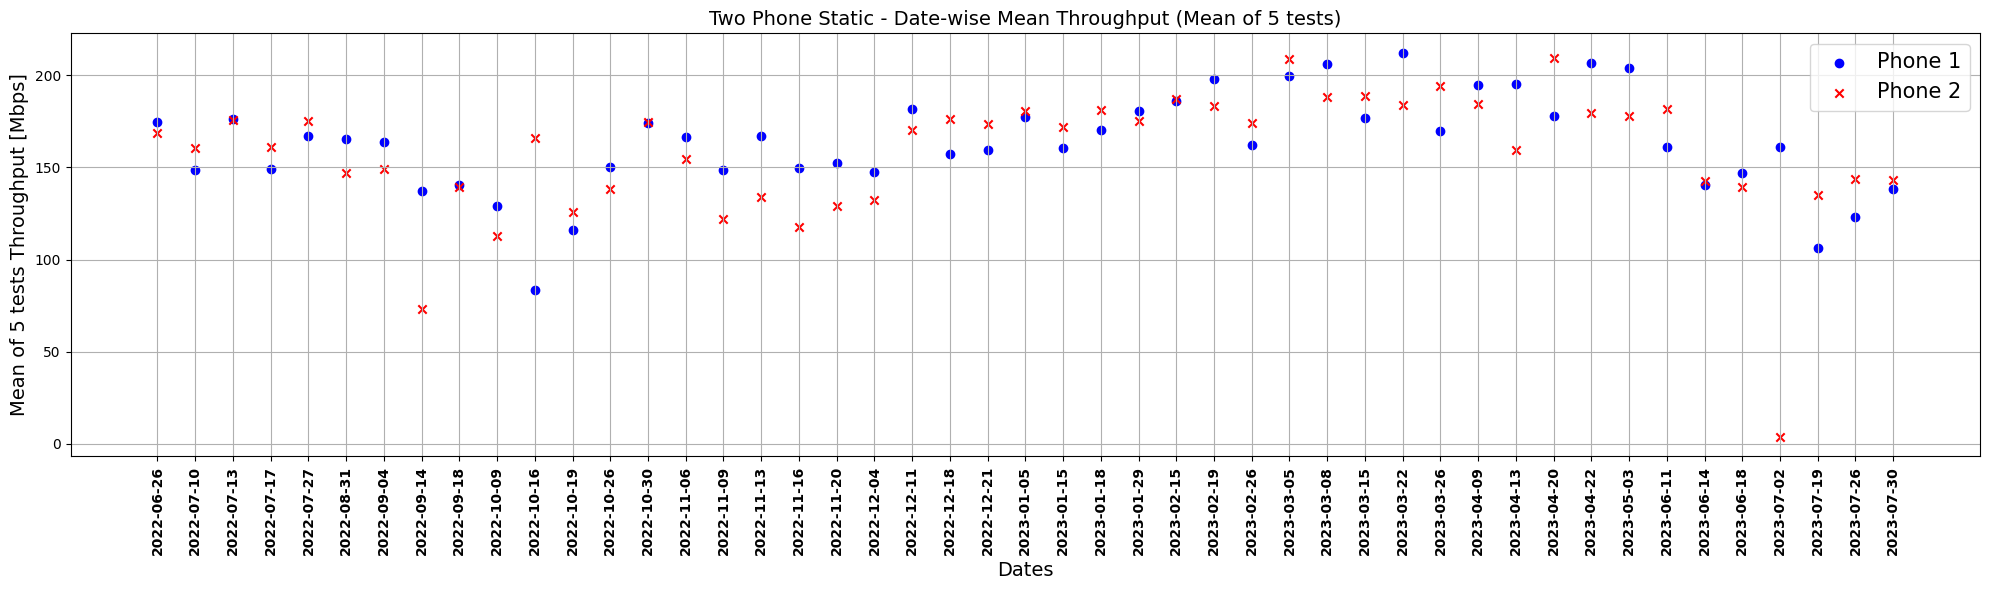

In [21]:
TWO_PHONE_FIRST_PATH=["phone_1","two_phone_1"]
TWO_PHONE_SECOND_PATH=["phone_2","two_phone_2"]
averageResults_firstPhone=getAveragesFromSinglePhoneFiles_twopoints('run_static',TWO_PHONE_FIRST_PATH)
averageResults_secondPhone=getAveragesFromSinglePhoneFiles_twopoints('run_static',TWO_PHONE_SECOND_PATH)
plotDualPhoneData_twopoints(evalTimeStamps,averageResults_firstPhone,averageResults_secondPhone,"Two Phone Static - Date-wise Mean Throughput (Mean of 5 tests)", xlabel='Dates',ylabel='Mean of 5 tests Throughput [Mbps]',labels= ['Phone 1','Phone 2'])

### Two Phone StaticAway tput - two points only

c:\Users\smeet\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\smeet\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


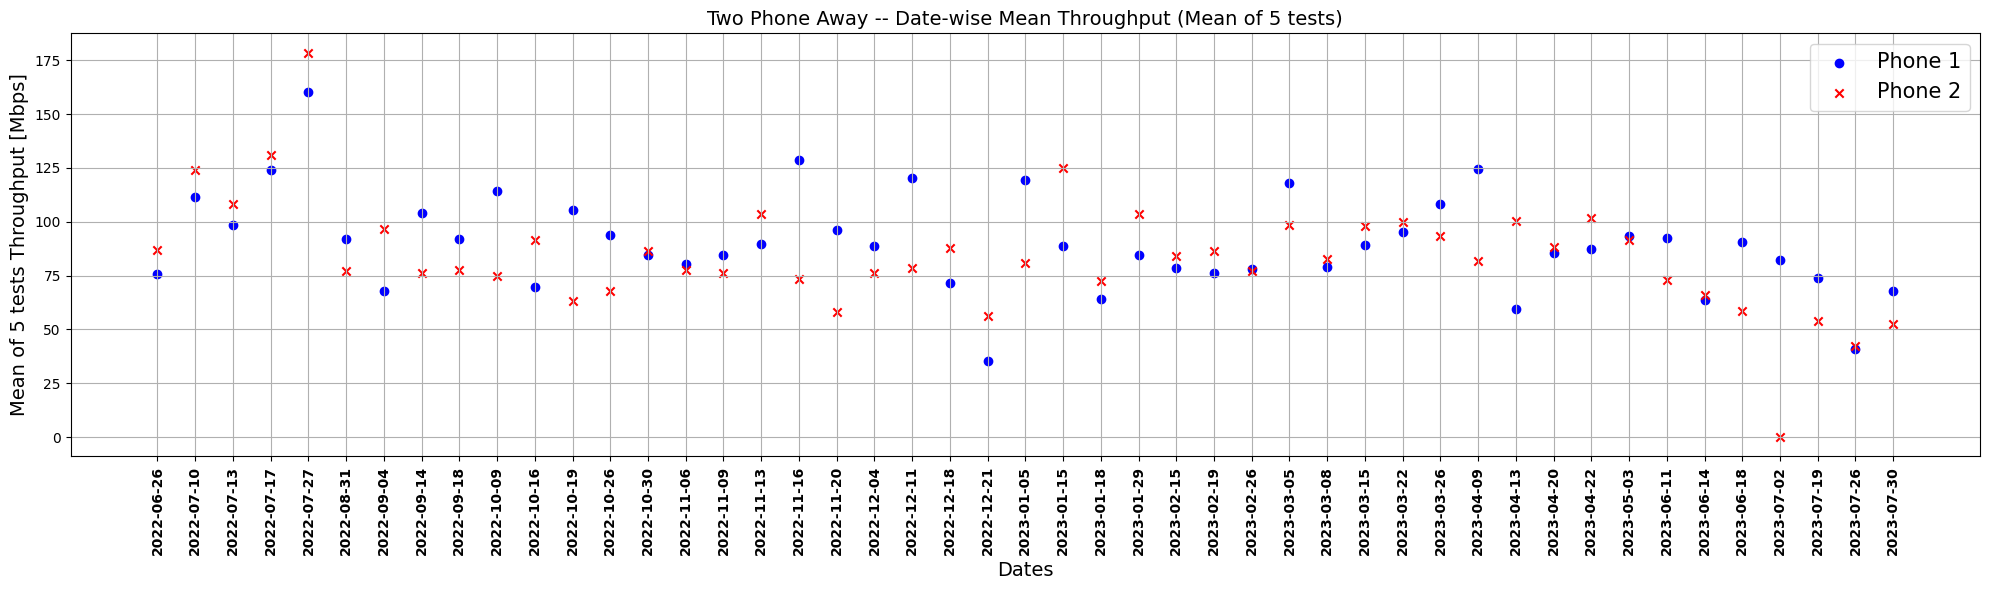

In [22]:
averageResults_firstPhone=getAveragesFromSinglePhoneFiles_twopoints('run_staticaway',TWO_PHONE_FIRST_PATH)
averageResults_secondPhone=getAveragesFromSinglePhoneFiles_twopoints('run_staticaway',TWO_PHONE_SECOND_PATH)
plotDualPhoneData_twopoints(evalTimeStamps,averageResults_firstPhone,averageResults_secondPhone,"Two Phone Away -- Date-wise Mean Throughput (Mean of 5 tests)", xlabel='Dates',ylabel='Mean of 5 tests Throughput [Mbps]',labels= ['Phone 1','Phone 2'])

### Two Phone tput static

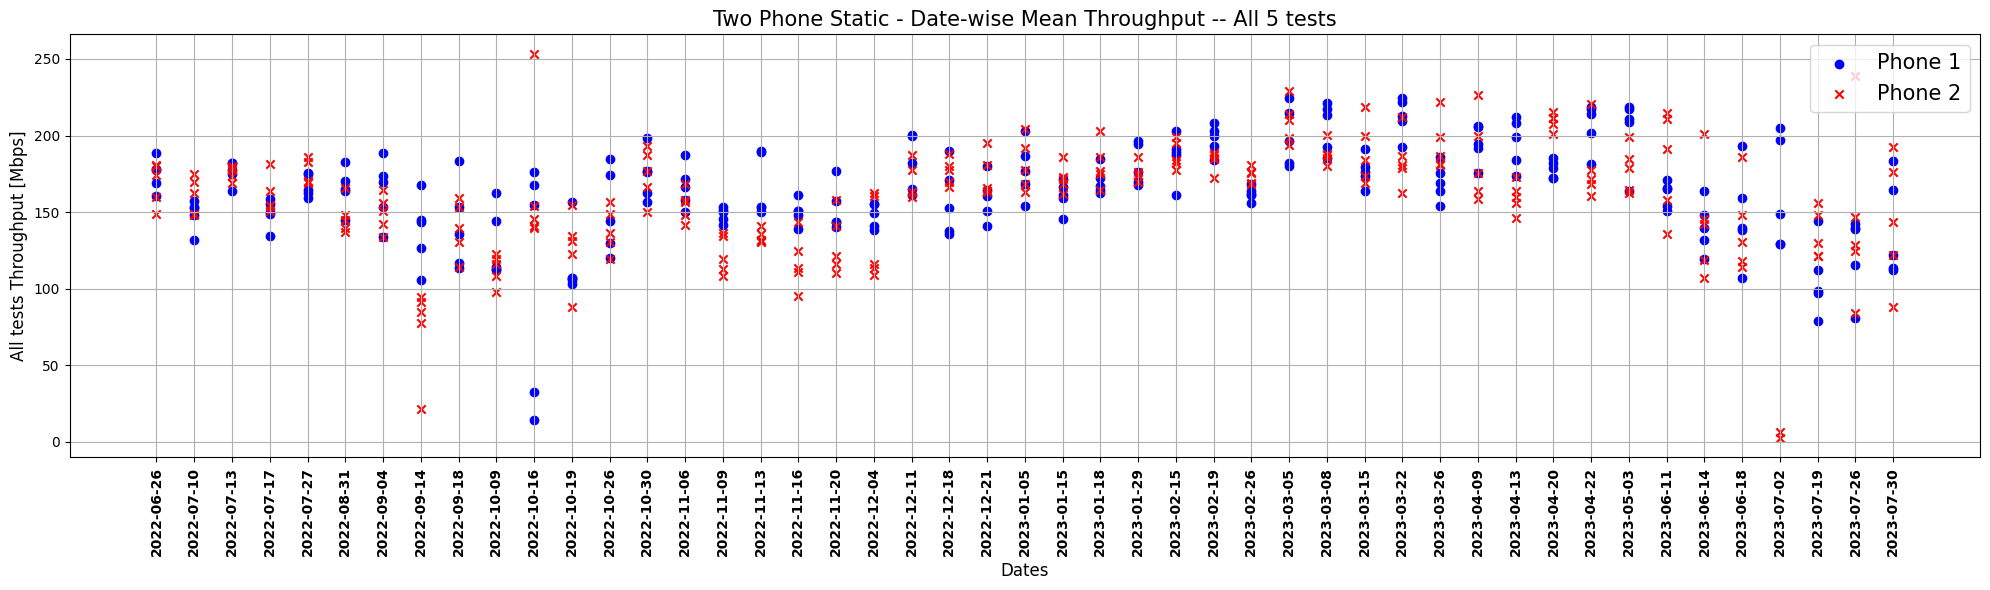

In [23]:
TWO_PHONE_FIRST_PATH=["phone_1","two_phone_1"]
TWO_PHONE_SECOND_PATH=["phone_2","two_phone_2"]
averageResults_firstPhone=getAveragesFromSinglePhoneFiles('run_static',TWO_PHONE_FIRST_PATH)
averageResults_secondPhone=getAveragesFromSinglePhoneFiles('run_static',TWO_PHONE_SECOND_PATH)
plotDualPhoneData(evalTimeStamps,averageResults_firstPhone,averageResults_secondPhone,"Two Phone Static - Date-wise Mean Throughput -- All 5 tests", xlabel='Dates',ylabel='All tests Throughput [Mbps]',labels= ['Phone 1','Phone 2'])

### Two Phone Tput StaticAway

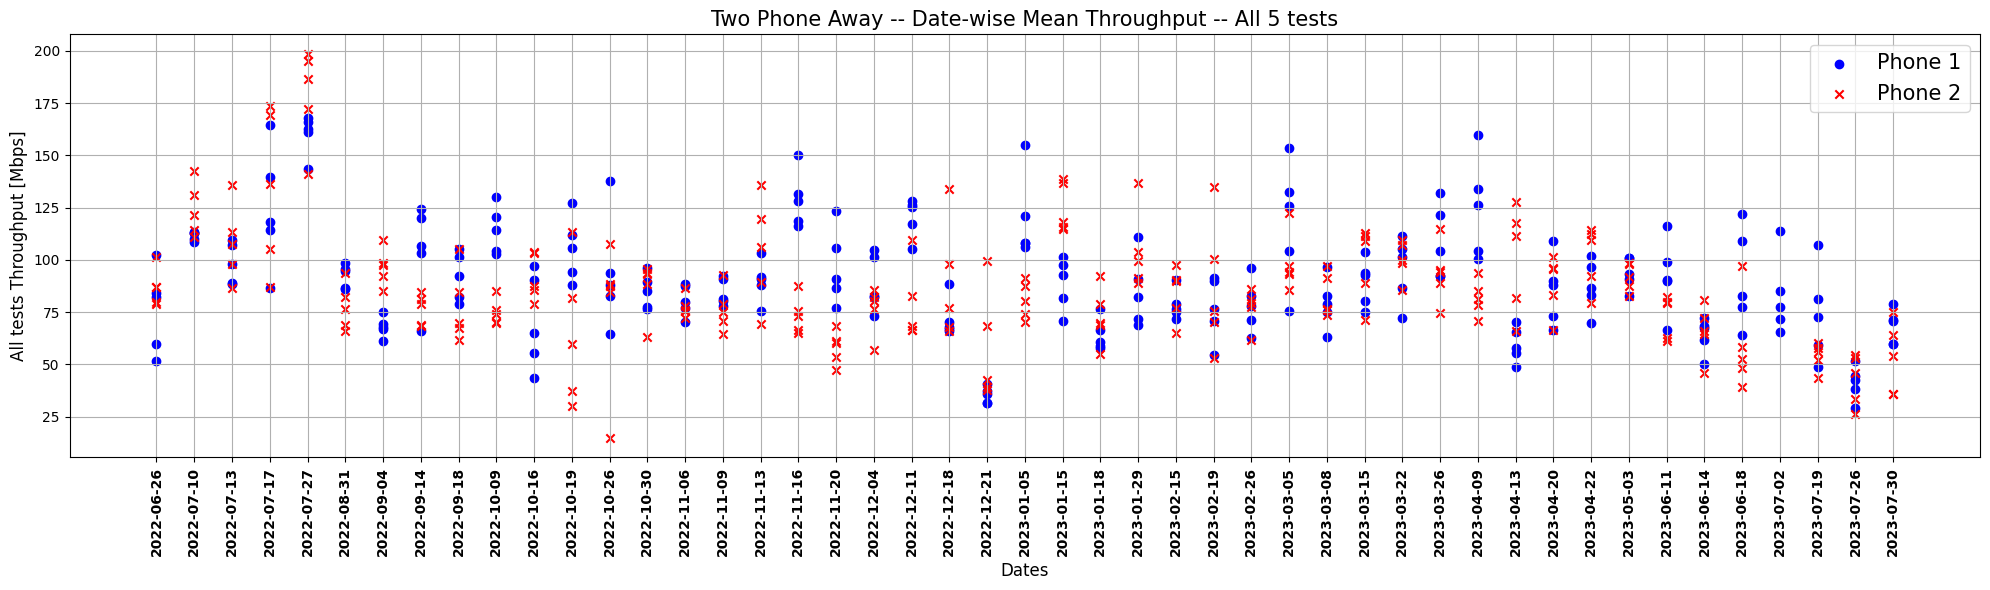

In [24]:
averageResults_firstPhone=getAveragesFromSinglePhoneFiles('run_staticaway',TWO_PHONE_FIRST_PATH)
averageResults_secondPhone=getAveragesFromSinglePhoneFiles('run_staticaway',TWO_PHONE_SECOND_PATH)
plotDualPhoneData(evalTimeStamps,averageResults_firstPhone,averageResults_secondPhone,"Two Phone Away -- Date-wise Mean Throughput -- All 5 tests", xlabel='Dates',ylabel='All tests Throughput [Mbps]',labels= ['Phone 1','Phone 2'])

# Ping visualizer 

In [25]:
def PingParser(filename:str) -> list:   # time in ms
    """ 
    Collects the ping values from the Ping.out files

    args: 
        filename: The name of the ping file
    return:
        list of time values 
    """
    fh = open(filename, "r")
    data = fh.readlines()
    time_values = []
    for d in data:
        if 'time=' in d:
            time_value = d.split('time=')[1].split(" ")[0]
            time_values.append(float(time_value))
    return time_values


In [26]:
# Same script to traverse the files --> only change made is in if --> to handle 'run_ping_static' files
STATIC_PATH_SINGLE_PHONE=os.path.join("phone_1","one_phone")
IGNORED_FILES=['matplotlibrc', 'plot_data.py']
failedFolders=[]
static_ping =[]
mean_list  =[]  #  mean of each lists 
for currFolder in os.listdir(TARGET_FOLDER):
    if currFolder not in IGNORED_FILES: 
        currPath=os.path.join(TARGET_FOLDER,currFolder)
        dateFolder=os.path.join(currPath,STATIC_PATH_SINGLE_PHONE)
        time_values = []   
        mean_sub_list = []
        for currFile in os.listdir(dateFolder):
            if currFile in [f"run_ping_static{i}.out" for i in range(1,6)]:
                currFilePath=os.path.join(dateFolder,currFile)
                time_values.extend(PingParser(currFilePath))   # Creating  biggerlist of all the sublist ( ping test from 1 to 5 tests)
                mean_sub_list.append(np.mean(PingParser(currFilePath)))
        static_ping.append(time_values)
        mean_list.append(mean_sub_list)

In [27]:
import pandas as pd
# creating mean max and minium columns 
data = { 'Dates': evalTimeStamps, 'Ping_values': static_ping, 'mean_sub_list': mean_list}
ping_df = pd.DataFrame(data)
ping_df.head()


,Dates,Ping_values,mean_sub_list
0,2022-06-26,"[13.5, 12.6, 15.7, 13.0, 12.6, 12.0, 15.8, 15....","[15.212900000000001, 41.233000000000004, 28.70..."
1,2022-07-10,"[25.1, 23.2, 22.6, 12.1, 21.4, 27.0, 22.9, 20....","[23.801000000000002, 24.236999999999995, 24.36..."
2,2022-07-13,"[3022.0, 2822.0, 2621.0, 2411.0, 2202.0, 2001....","[2309.0, 26.033000000000005, 24.889, 23.843000..."
3,2022-07-17,"[12.2, 25.8, 27.3, 27.7, 28.0, 11.2, 29.1, 26....","[23.679000000000002, 23.708799999999997, 26.85..."
4,2022-07-27,"[28.6, 18.0, 32.1, 22.7, 22.0, 17.4, 25.9, 27....","[23.796800000000005, 25.498, 22.92060000000000..."


### One Phone Ping

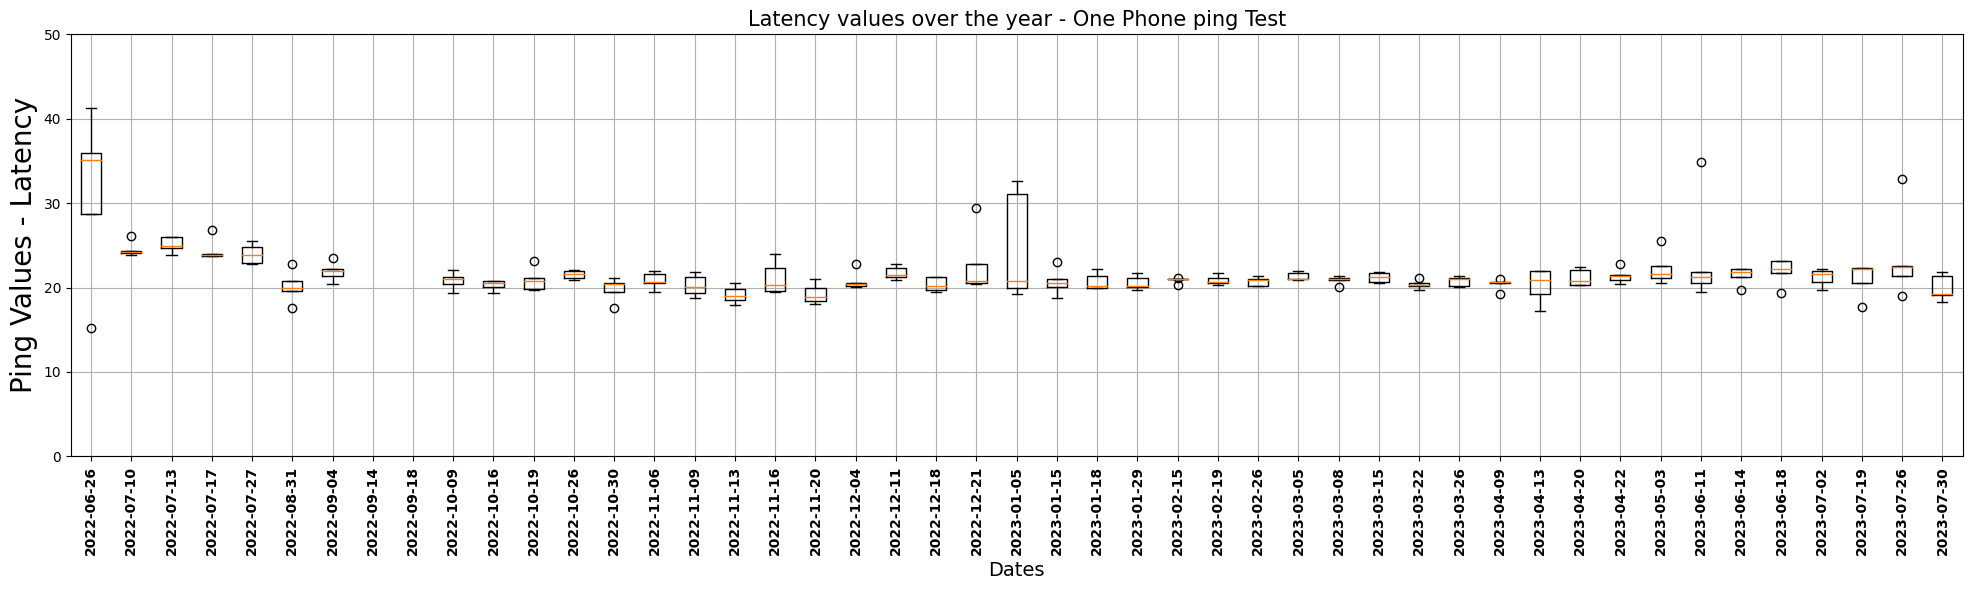

In [28]:

# Convert the 'Dates' column to datetime
ping_df['Dates'] = pd.to_datetime(ping_df['Dates'])
# Plotting
plt.figure(figsize=(20, 6))
plt.title("Latency values over the year - One Phone ping Test",fontsize=15)
plt.xticks(rotation=90,fontweight='bold',fontsize=10)
plt.grid(True)
plt.xlabel('Dates',fontsize=14)
plt.ylabel('Ping Values - Latency',fontsize=20)
# Create boxplots
plt.boxplot(ping_df['mean_sub_list'], labels=ping_df['Dates'].dt.strftime('%Y-%m-%d'))
plt.tight_layout()
# Set the y-axis limits  - Latency Values
plt.ylim(0, 50)     
# Show the plot
plt.show()

### Mobility Tput tests

In [29]:
def getAveragesFromSinglePhoneFiles_Mobility(fileName :str ,fileFolderList :list) -> list:
    """
    Reads the mobility tests and gets the averages 
    args:
        fileName : name of the files to be read
        fileFolderList: The folder location provided as a list
    return:
        A list of lists of ping averages for mobility tests
    """
    selectedPath=os.path.join(fileFolderList[0],fileFolderList[1])
    IGNORED_FILES=['matplotlibrc', 'plot_data.py']
    averageResults=[]
    for dateFolder in os.listdir(TARGET_FOLDER):
        if dateFolder not in IGNORED_FILES: 
            currPath=os.path.join(TARGET_FOLDER,dateFolder)
            phoneDataPath=os.path.join(currPath,selectedPath)
            averages=[]
            for currFile in os.listdir(phoneDataPath):
                if currFile in [f"{fileName}.out"]:
                    currFilePath=os.path.join(phoneDataPath,currFile)
                    currAverage=np.mean(getParseData(currFilePath))
                    averages.append(currAverage)
            averageResults.append(averages)
    return averageResults

### One Phone Tput mobility Tests.  (A-->B)  and (B-->A)

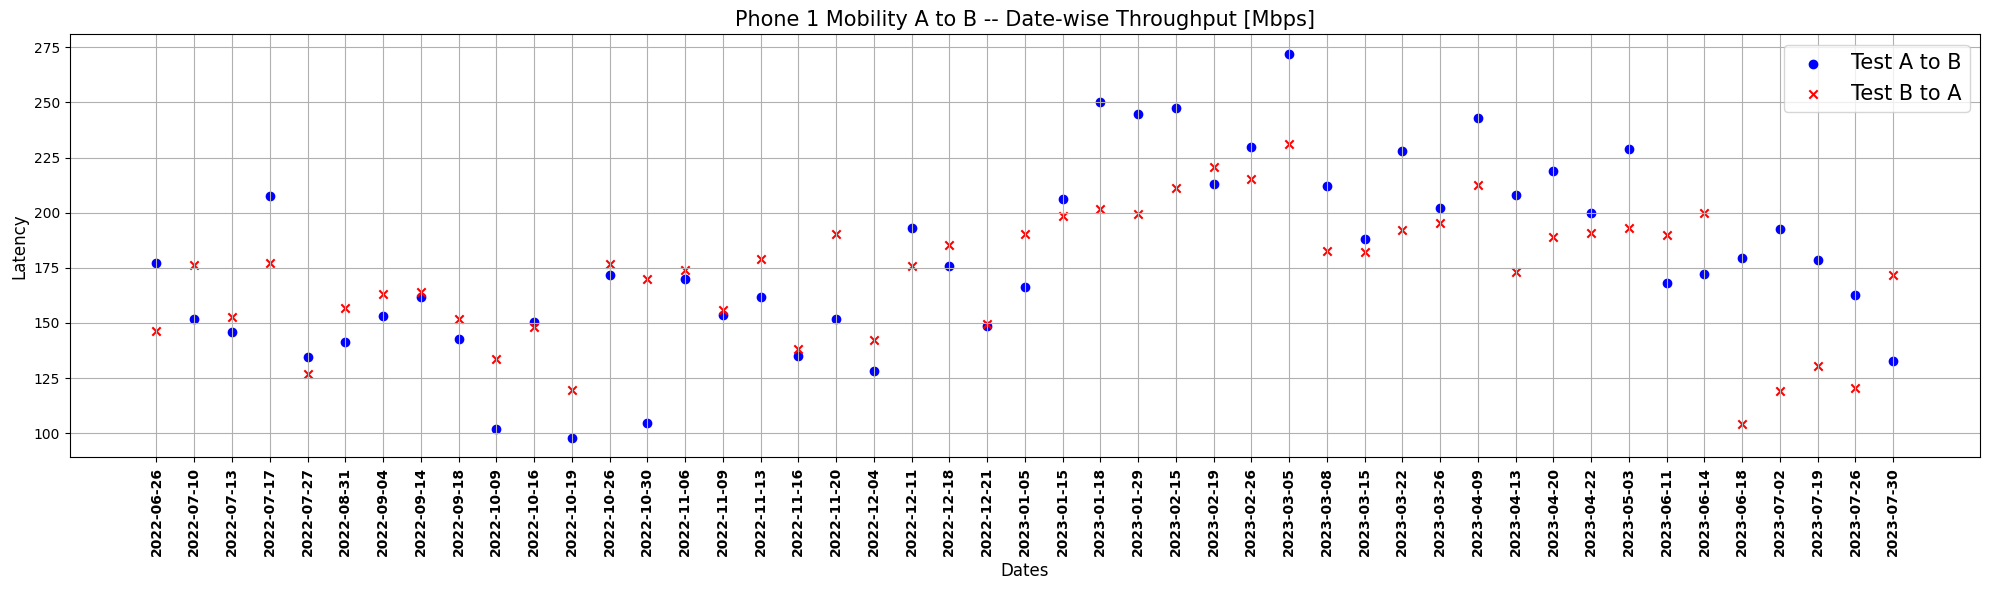

In [30]:
SINGLE_PHONE_PATH_LIST=["phone_1","one_phone"]
averageResultsTestOne=getAveragesFromSinglePhoneFiles_Mobility('run_mobility1',SINGLE_PHONE_PATH_LIST)
averageResultsTestTwo = getAveragesFromSinglePhoneFiles_Mobility('run_mobility2', SINGLE_PHONE_PATH_LIST)
plotDualPhoneData(evalTimeStamps,averageResultsTestOne,averageResultsTestTwo, "Phone 1 Mobility A to B -- Date-wise Throughput [Mbps]", xlabel='Dates',ylabel='Latency',labels =['Test A to B', 'Test B to A'])

### Two Phone Tput Mobility Tests  (A-->B)

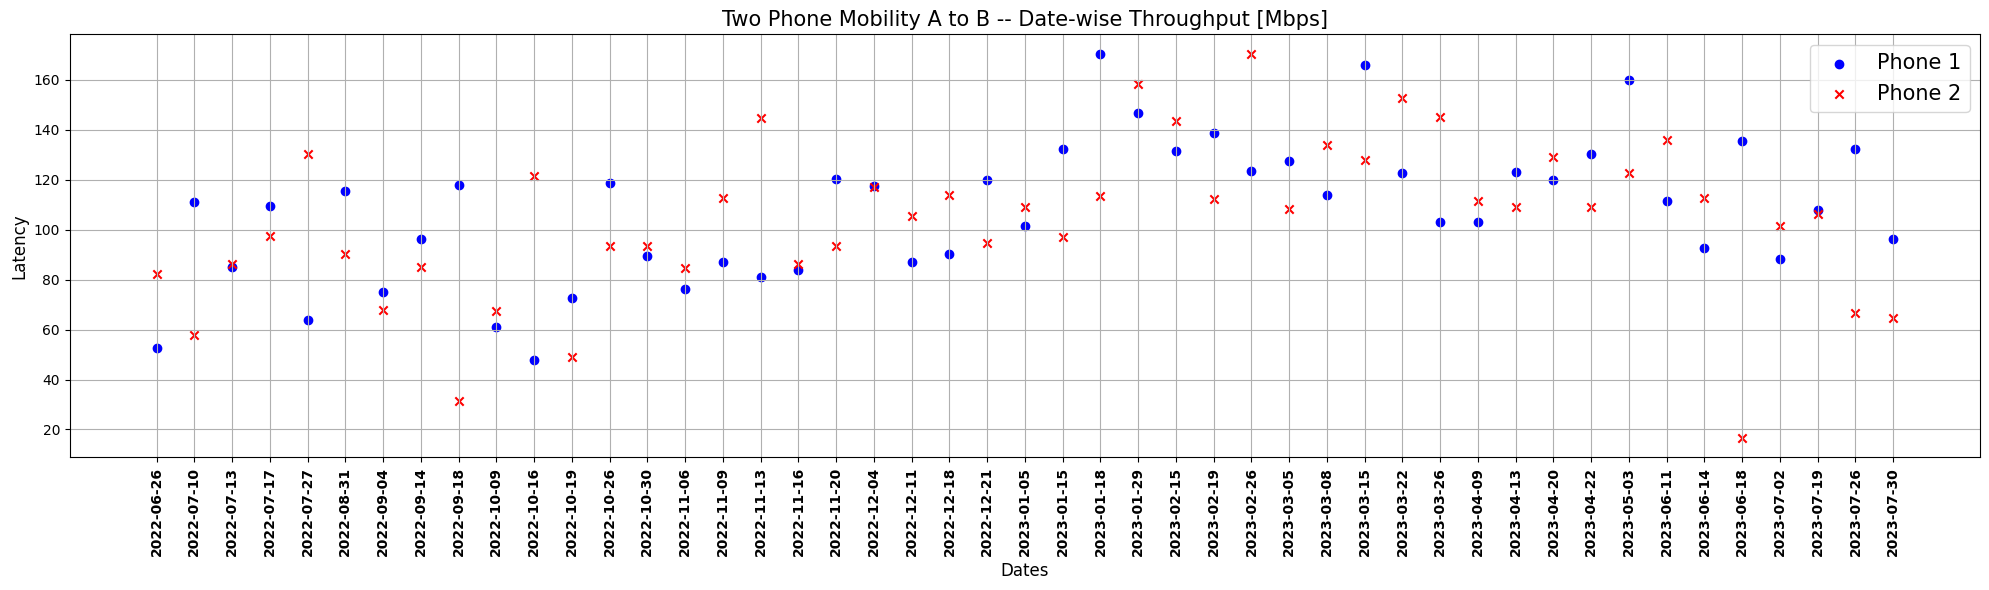

In [31]:
TWO_PHONE_FIRST_PATH=["phone_1","two_phone_1"]
TWO_PHONE_SECOND_PATH=["phone_2","two_phone_2"]
averageResults_firstPhone_Test1=getAveragesFromSinglePhoneFiles_Mobility('run_mobility1',TWO_PHONE_FIRST_PATH)
averageResults_secondPhone_Test2=getAveragesFromSinglePhoneFiles_Mobility('run_mobility1',TWO_PHONE_SECOND_PATH)
plotDualPhoneData(evalTimeStamps,averageResults_firstPhone_Test1,averageResults_secondPhone_Test2,"Two Phone Mobility A to B -- Date-wise Throughput [Mbps]", xlabel='Dates',ylabel='Latency',labels =['Phone 1','Phone 2'])

### Two Phone Tput Mobility Tests (B-->A)

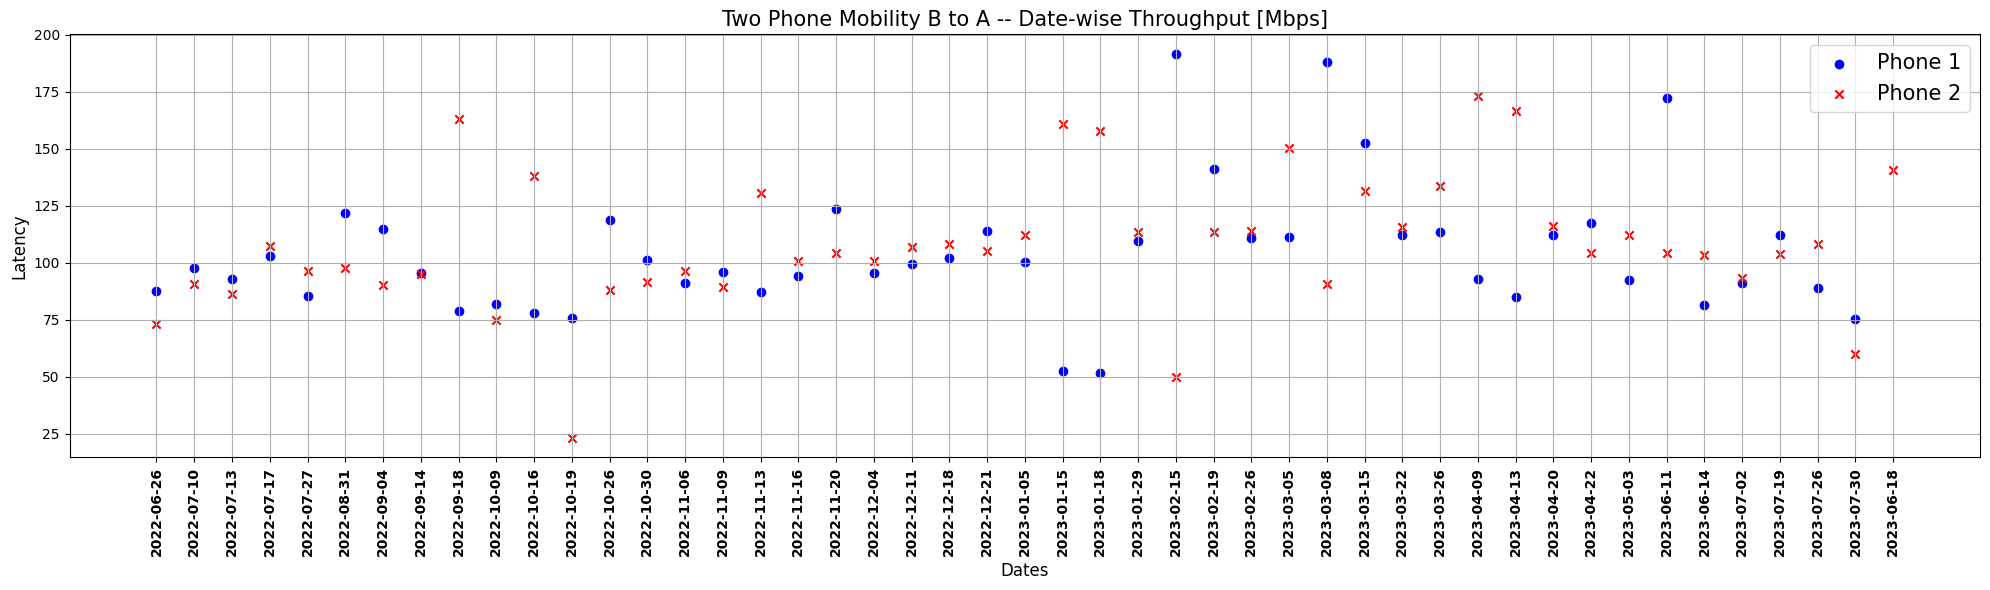

In [32]:
TWO_PHONE_FIRST_PATH=["phone_1","two_phone_1"]
TWO_PHONE_SECOND_PATH=["phone_2","two_phone_2"]
averageResults_firstPhone_Test1=getAveragesFromSinglePhoneFiles_Mobility('run_mobility2',TWO_PHONE_FIRST_PATH)
averageResults_secondPhone_Test2=getAveragesFromSinglePhoneFiles_Mobility('run_mobility2',TWO_PHONE_SECOND_PATH)
plotDualPhoneData(evalTimeStamps,averageResults_firstPhone_Test1,averageResults_secondPhone_Test2,"Two Phone Mobility B to A -- Date-wise Throughput [Mbps]", xlabel='Dates',ylabel='Latency',labels =['Phone 1','Phone 2'])

## Fairness Index 

In [33]:
def fairness_index(arr1,arr2):

    fairness_list  =[]
    for i in range(47):
        one_day = []

        # 23-07-02 has only two static files for which this code checking is written
        if len(arr1[i]) == len(arr2[i]):
            for j in range(len(arr1[i])):
                x = arr1[i][j]
                y = arr2[i][j]

                numerator =  (x+y)**2
                denominator = 2*(x**2  + y**2)

                fairness = numerator/denominator

                one_day.append(fairness)
        fairness_list.append(one_day)
    return fairness_list

### Two Phone Static Test

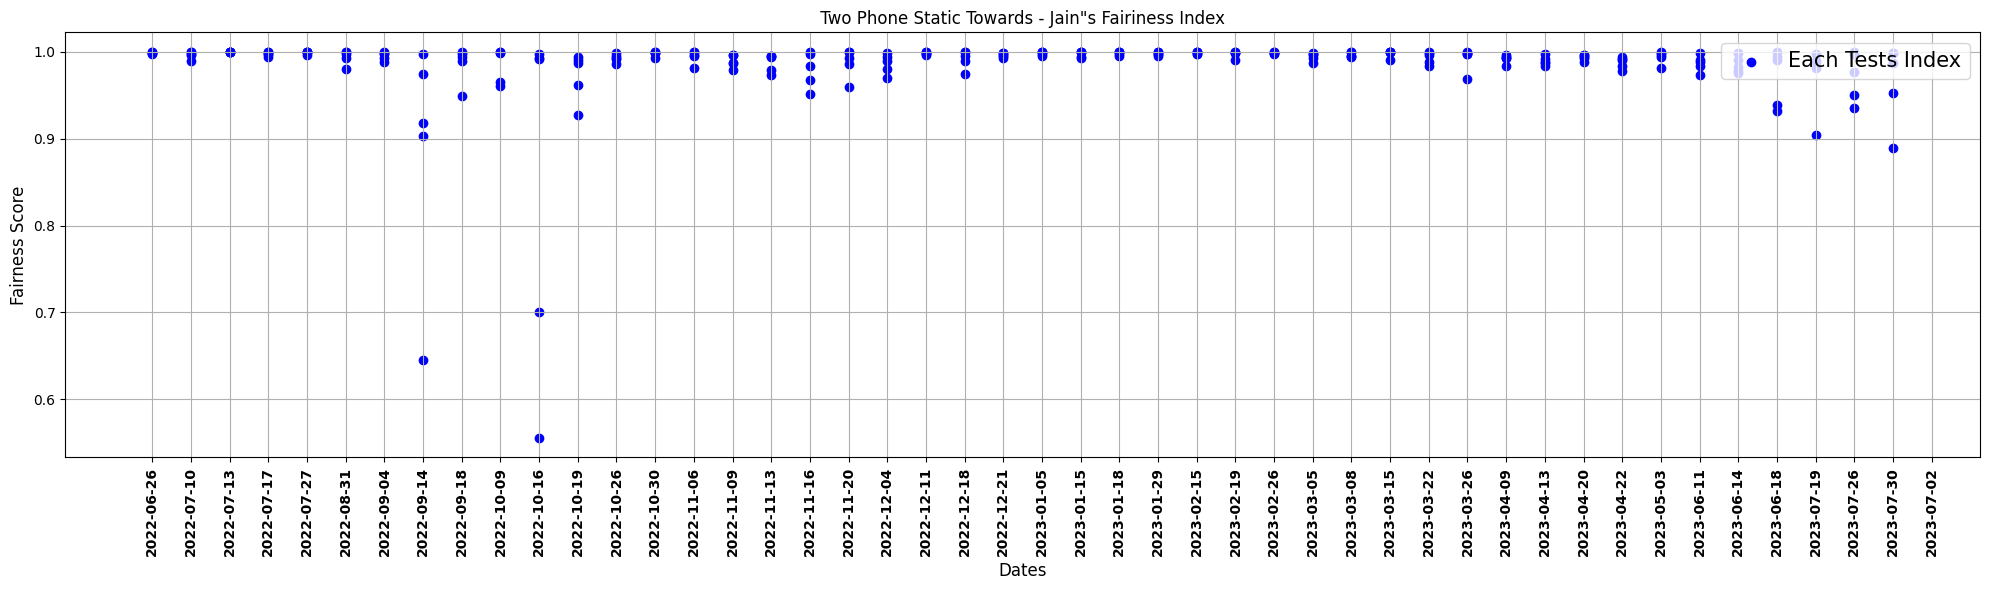

In [34]:
TWO_PHONE_FIRST_PATH=["phone_1","two_phone_1"]
TWO_PHONE_SECOND_PATH=["phone_2","two_phone_2"]
firstphone_fairness = getAveragesFromSinglePhoneFiles('run_static',TWO_PHONE_FIRST_PATH)
secondphone_fairness =  getAveragesFromSinglePhoneFiles('run_static',TWO_PHONE_SECOND_PATH)

static_result = fairness_index(firstphone_fairness, secondphone_fairness)
plotData(evalTimeStamps,static_result,' Two Phone Static Towards - Jain"s Fairiness Index ',xlabel = 'Dates', ylabel='Fairness Score',legend='Each Tests Index')

### Two Phone StaticAway

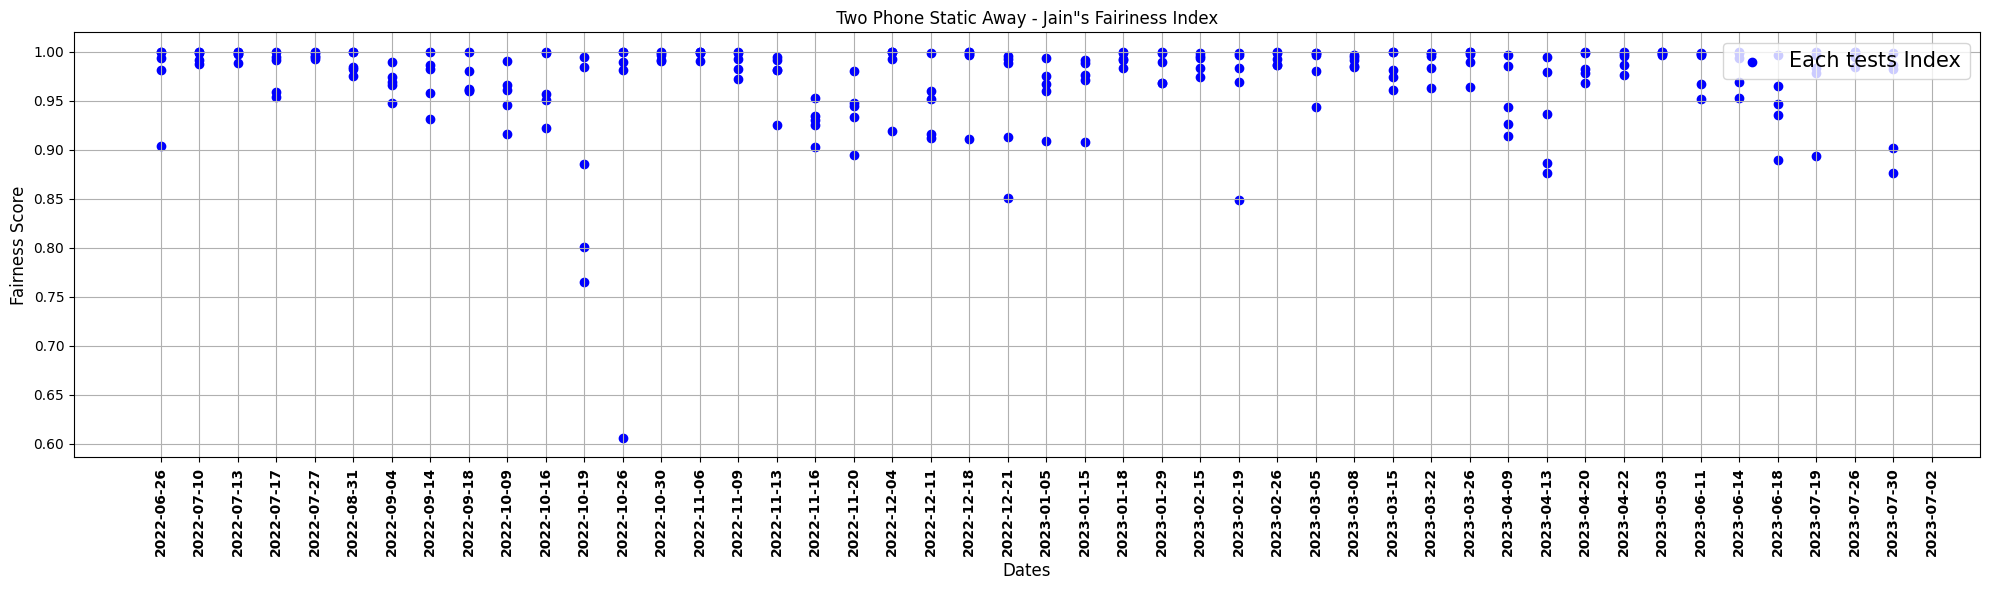

In [35]:
TWO_PHONE_FIRST_PATH=["phone_1","two_phone_1"]
TWO_PHONE_SECOND_PATH=["phone_2","two_phone_2"]
firstphone_fairness = getAveragesFromSinglePhoneFiles('run_staticaway',TWO_PHONE_FIRST_PATH)
secondphone_fairness =  getAveragesFromSinglePhoneFiles('run_staticaway',TWO_PHONE_SECOND_PATH)

staticaway_result = fairness_index(firstphone_fairness, secondphone_fairness)
plotData(evalTimeStamps,staticaway_result,' Two Phone Static Away - Jain"s Fairiness Index ',xlabel='Dates', ylabel= 'Fairness Score', legend='Each tests Index')

### Two Phone Mobility Tests

#### A --> B

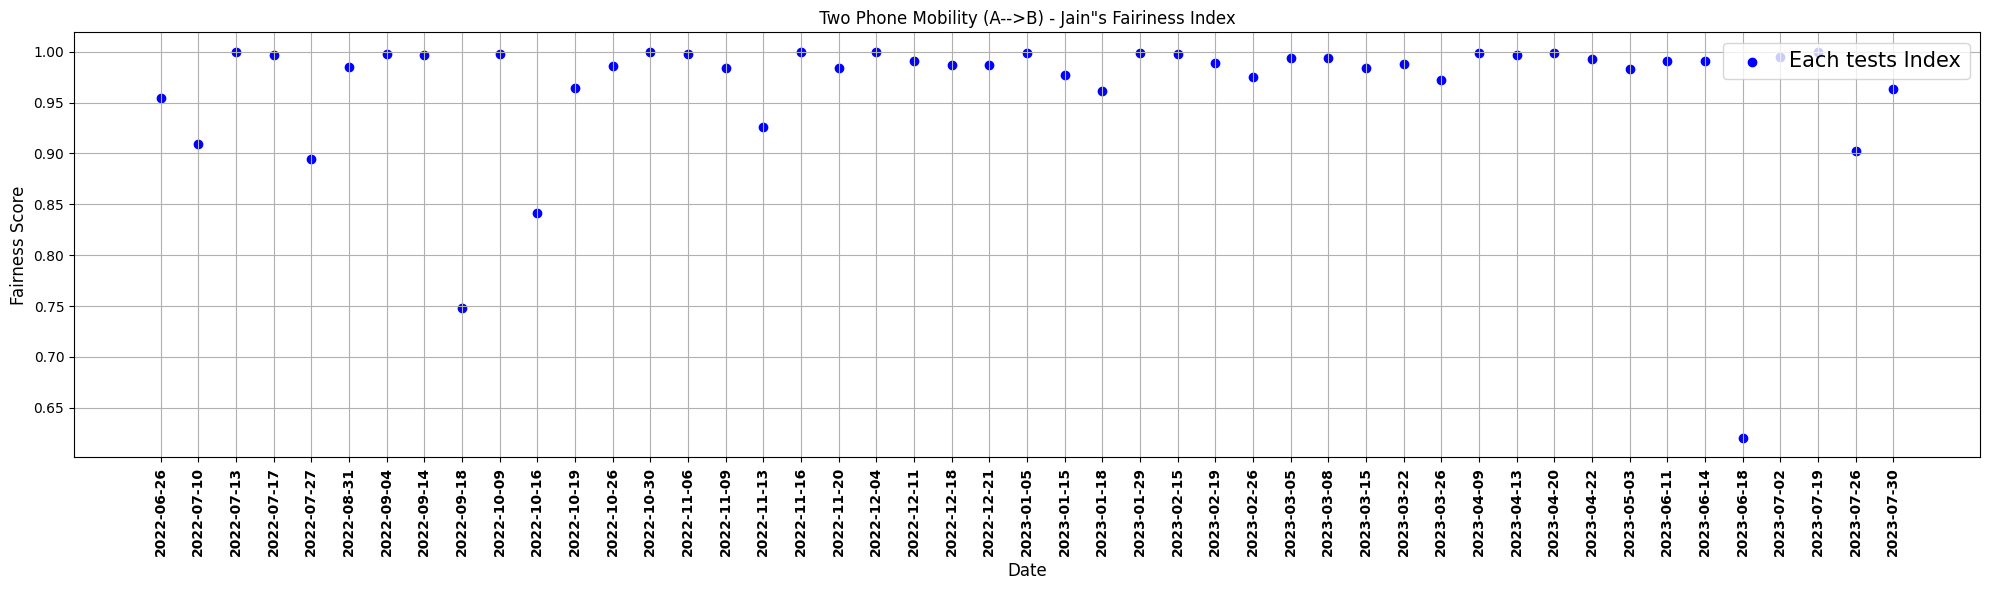

In [36]:
TWO_PHONE_FIRST_PATH=["phone_1","two_phone_1"]
TWO_PHONE_SECOND_PATH=["phone_2","two_phone_2"]
averageResults_firstPhone_Test1=getAveragesFromSinglePhoneFiles_Mobility('run_mobility1',TWO_PHONE_FIRST_PATH)
averageResults_secondPhone_Test2=getAveragesFromSinglePhoneFiles_Mobility('run_mobility1',TWO_PHONE_SECOND_PATH)

mobility_result = fairness_index(averageResults_firstPhone_Test1,  averageResults_secondPhone_Test2)
plotData(evalTimeStamps, mobility_result,' Two Phone Mobility (A-->B) - Jain"s Fairiness Index ',xlabel='Date',ylabel='Fairness Score', legend='Each tests Index')

#### B --> A

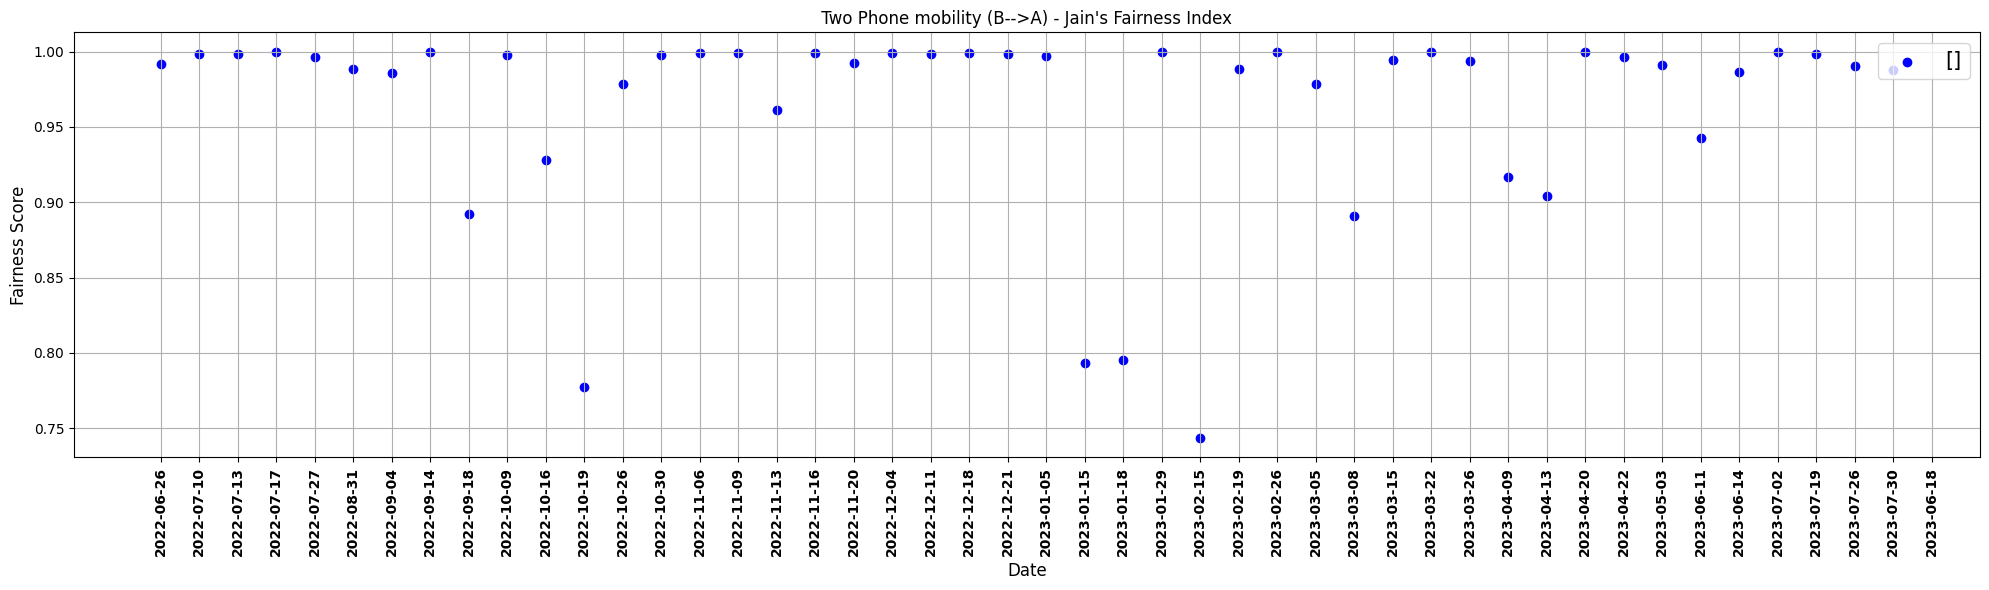

In [37]:
TWO_PHONE_FIRST_PATH=["phone_1","two_phone_1"]
TWO_PHONE_SECOND_PATH=["phone_2","two_phone_2"]
averageResults_firstPhone_Test1=getAveragesFromSinglePhoneFiles_Mobility('run_mobility2',TWO_PHONE_FIRST_PATH)
averageResults_secondPhone_Test2=getAveragesFromSinglePhoneFiles_Mobility('run_mobility2',TWO_PHONE_SECOND_PATH)

mobility_result = fairness_index(averageResults_firstPhone_Test1,  averageResults_secondPhone_Test2)
plotData(evalTimeStamps, mobility_result," Two Phone mobility (B-->A) - Jain's Fairness Index ", xlabel='Date', ylabel='Fairness Score',legend=[])